#### Importing main libraries

In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import copy
import matplotlib.pyplot as plt
from copy import deepcopy
from sklearn.model_selection import train_test_split
from fbprophet import Prophet
from sklearn import metrics

/Users/leilasapple/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/Users/leilasapple/.matplotlib/matplotlibrc", line #621
  (fname, cnt))


#### Path directory and data files

In [2]:
input_data_path='/Users/leilasapple/Documents/Springboard/recruit-restaurant-visitor-forecasting/input_files/'
output_data_path='/Users/leilasapple/Documents/Springboard/recruit-restaurant-visitor-forecasting/output_files/'
data=pd.read_csv(os.path.join(output_data_path,'data1.csv'))

##### Extracting date of visiting resturant

In [3]:
data['date']=data.loc[:,'id'].apply(lambda x: datetime.strptime(x[-10:], '%Y-%m-%d'))

#### Defining model function
The prophet model can be run only once. There for a function was defined to solve this issue

In [ ]:
def prophet_model(df,test):
    m = Prophet(growth='linear',daily_seasonality=True,interval_width=0.95,
                    weekly_seasonality=True,yearly_seasonality=True)
    m.fit(df)
    fcast=m.predict(test)
    return fcast,m

The idea is to investigate daily variation of resrvation in all resturant. Once for total reservation and another time for the average of reservations in all resturants. Every group contains data in ever day. 

In [5]:
grouped=data.groupby('date')
uniq_date_len=len(data.date.unique())

The total reservation of all resturant daily, not for each resturanct.

      y         ds  holiday_0.0  holiday_1.0
0   265 2016-01-01            0            1
1  1668 2016-01-02            0            1
2  1588 2016-01-03            0            1
3  1344 2016-01-04            1            0
4  1312 2016-01-05            1            0


/Users/leilasapple/anaconda/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


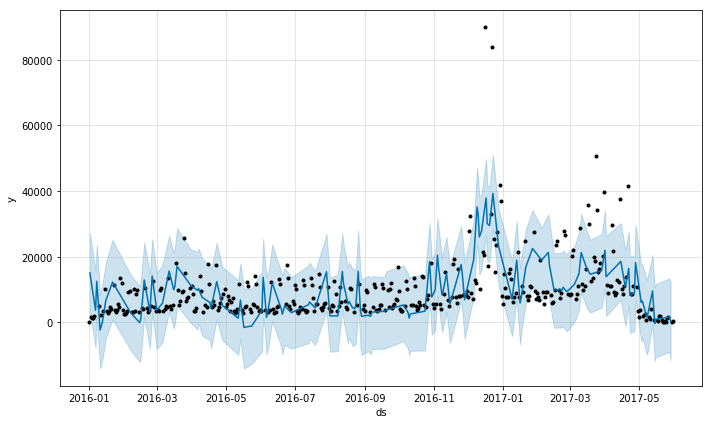

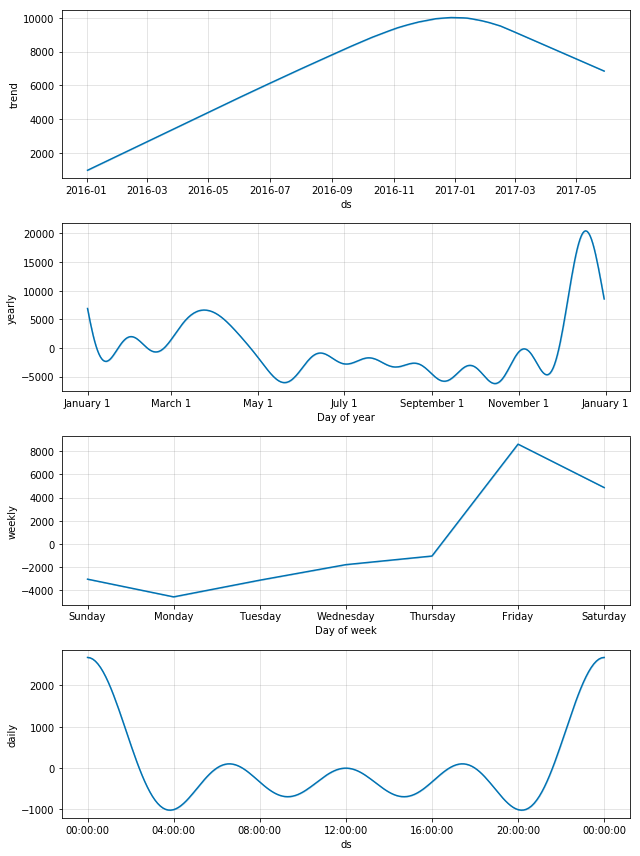

In [15]:
ddata_s=pd.DataFrame(data=np.empty(shape=[uniq_date_len,3]),columns=['y','ds','holiday'])
#find the unique date of data 
for i,item in enumerate(grouped.groups):ddata_s.loc[i,'ds']=grouped.get_group(item).loc[:,'date'].unique()[0]
#calculating total customer everyday
ddata_s['y']=[grouped.get_group(i).iloc[:,3].sum() for i in grouped.groups]
#To find if that day is holiday or not for each group
for i,item in enumerate(grouped.groups):ddata_s.loc[i,'holiday']=grouped.get_group(item).loc[:,'holiday'].unique()[0]
labelencoder_X = LabelEncoder()
ddata_s=pd.get_dummies(ddata_s, columns=["holiday"])
print(ddata_s.head())
x_train,x_test,y_train,y_test=train_test_split(ddata_s,ddata_s['y'],test_size=0.25,random_state=0)
y_daily,model=prophet_model(x_train,x_test)

RMSE=metrics.mean_squared_error(x_test.y, y_daily.yhat)
R2=metrics.r2_score(x_test.y, y_daily.yhat)

fig=plt.figure(figsize=(20, 15))
model.plot(y_daily)
plt.show()
fig.savefig(os.path.join(output_data_path,'Total_daily_customer_1.png'))   # save the figure to file\n",
plt.close(fig) 

fig=plt.figure(figsize=(20, 15))
model.plot_components(y_daily)
plt.show()
#fig.savefig(os.path.join(output_data_path,'Total_daily_customer_components.png'))   # save the figure to file\n",
plt.close(fig)

The R2 and Root mean squared erroe

In [16]:
print('R2: ',R2,'\n','RMSE: ',RMSE)

R2:  -0.7621608159642543 
 RMSE:  194759816.7357613


The average reservation of all resturant daily, not for each resturanct.

/Users/leilasapple/anaconda/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


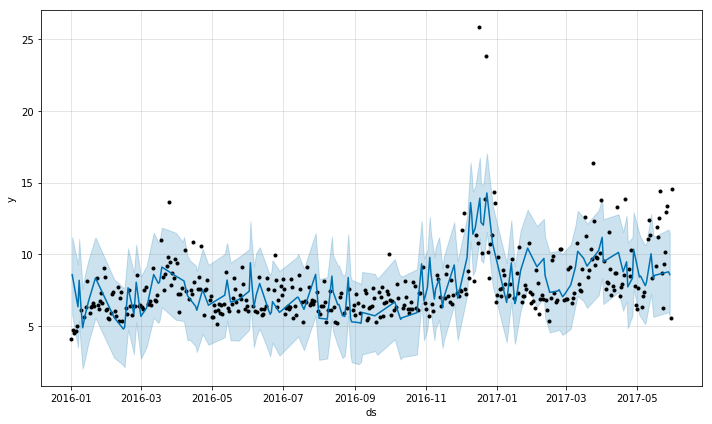

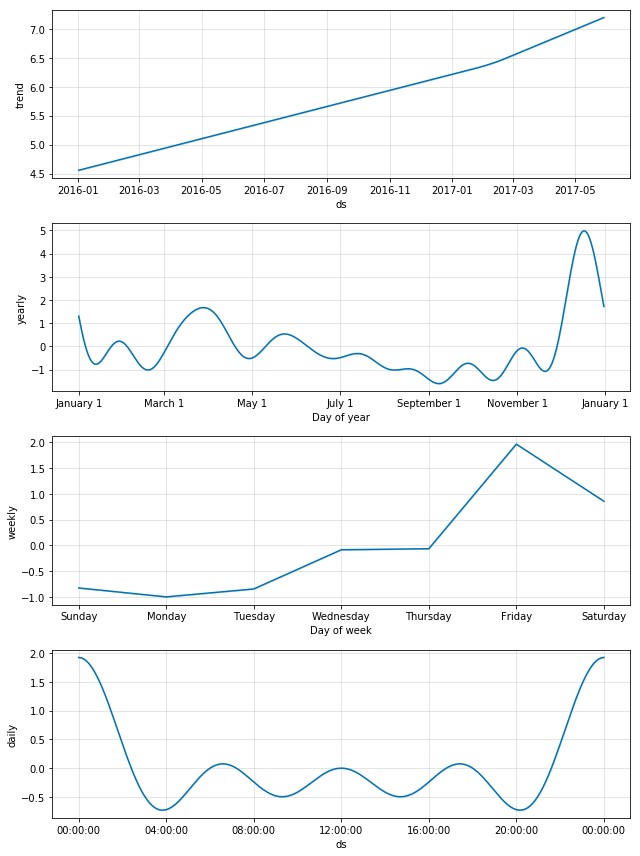

In [17]:
ddata_m=pd.DataFrame(data=np.empty(shape=[uniq_date_len,3]),columns=['y','ds','holiday'])
for i,item in enumerate(grouped.groups):ddata_m.loc[i,'ds']=grouped.get_group(item).loc[:,'date'].unique()[0]
ddata_m['y']=[grouped.get_group(i).iloc[:,3].mean() for i in grouped.groups]
for i,item in enumerate(grouped.groups):ddata_m.loc[i,'holiday']=grouped.get_group(item).loc[:,'holiday'].unique()[0]
x_train,x_test,y_train,y_test=train_test_split(ddata_m,ddata_m['y'],test_size=0.25,random_state=0)
y_daily,model=prophet_model(x_train,x_test)


RMSE=metrics.mean_squared_error(x_test.y, y_daily.yhat)
R2=metrics.r2_score(x_test.y, y_daily.yhat)

fig=plt.figure(figsize=(20, 15))
model.plot(y_daily)
plt.show()
fig.savefig(os.path.join(output_data_path,'Mean_daily_customer1.png'))   # save the figure to file\n",
plt.close(fig) 

fig=plt.figure(figsize=(20, 15))
model.plot_components(y_daily)
plt.show()
#fig.savefig(os.path.join(output_data_path,'Mean_daily_customer_components.png'))   # save the figure to file\n",
plt.close(fig)

The R2 and Root mean squared erroe

In [18]:
print('R2: ',R2,'\n','RMSE: ',RMSE)

R2:  -0.7071381854209682 
 RMSE:  11.113470940455395
